# ISE535 PROJECT

Employee Attrition is a huge problem across the industry and generally costs the company a lot for hiring, retraining, productivity and work loss for each employee who leaves. The project aims at building a model to understand whether an employee quits the company and to predict their exit in the near future. The project incorporates various classificatimon techniques to build the model and finally selects the best classification approach for the provided dataste.


### Dataset

The dataset consists of 11,397 obseravtions - (3546 Employees_Left + 7851 Existing_Employees data) and 10 variables. 
Each row in dataset represents an employee; each column contains employee attributes:

1. satisfaction_level (0 or 1)
2. last_evaluation (Time since last evaluation in years)
3. number_projects (Number of projects completed while working)
4. average_monthly_hours (Average monthly hours at workplace)
5. time_spend_company (Time spent at the company in years)
6. Work_accident (Whether the employee had a workplace accident)
7. left (Whether the employee left the workplace or not (0 or 1))
8. promotion_last_5years (Whether the employee was promoted in the last five years)
9. sales (Department in which they work for)
10. salary (Employee salary)

The dataset is available at Kaggle and this dataset is used for our analysis. The link to the dataset is below:
https://www.kaggle.com/udhhav/employeeattrition

# 1. Data Preprocessing

In [2]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import sys,traceback

In [3]:
#Importing Dataset from Excel File
Exist_emp=pd.read_excel(r'/Users/pulkeshiandaruka/Downloads/Python Project/Existing_Employees.xlsx') #dataset of exisiting employees
Left_emp=pd.read_excel(r'/Users/pulkeshiandaruka/Downloads/Python Project/Employees_Left.xlsx') #dataset of employees who left the company

In [4]:
#Data Preview - Existing Employees
Exist_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [5]:
#Data Preview - Employees who left the company
Left_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
#Datatype of each column - Existing Employees
Exist_emp.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [20]:
#Datatype of each column - Employees who left the company
Left_emp.dtypes

Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
#Missing values check
Exist_emp.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [7]:
#Missing values check
Left_emp.isnull().any()

Emp ID                   False
satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

## 2. Data Exploration

In [8]:
#Summary of each variable in Existing Employees Dataset
Exist_emp.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [9]:
#Summary of each variable in Employees who left Dataset
Left_emp.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [6]:
#Data Transformation
# Adding both dataset from employees who left with existing employees
Exist_emp['Left']=0
Left_emp['Left']=1
Concat_data=pd.concat([Exist_emp,Left_emp],axis=0)

In [7]:
#Summary of concatenated data
Concat_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [43]:
#Count of employees who left the company in the concatenated dataset
Concat_data['Left'].value_counts()

0    11428
1     3571
Name: Left, dtype: int64

We observe that 3571 employees left the company, which is 23.8 per cent of the total employees in the organisation.

In [12]:
#Average attributes value of Employee left vs Existng Employees
Concat_data.groupby('Left').mean()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Left,,,,,,,,
0,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Few Observations from the Data Exploration above:
1. The mean satisfaction level of the existing employees is higher than that of the employees who left.
2. The mean monthly work hours of existing employees is less than that of the employees who left.
3. The employees who didn't have workplace accidents are more likely to leave than that of employees who did have workplace accidents.
4. The employees who were promoted in the last five years are less likely to leave.

In [13]:
Concat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


## Dummification

In [8]:
#Creating dummies of data and salary variables for classification model
columns=['dept','salary']
dummies=pd.get_dummies(Concat_data[columns],drop_first=True)
Final_data=pd.concat([Concat_data,dummies],axis=1)

In [15]:
Final_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,...,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_low,salary_medium
0,2001,0.58,0.74,4,215,3,0,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [9]:
Final_data=Final_data.drop(columns,axis=1) #Dropping unnecessary columns

We can see here that 2 columns were disregarded and we are now left with 20 columns as for the final data.

In [10]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Left                   14999 non-null  int64  
 9   dept_RandD             14999 non-null  uint8  
 10  dept_accounting        14999 non-null  uint8  
 11  dept_hr                14999 non-null  uint8  
 12  dept_management        14999 non-null  uint8  
 13  dept_marketing         14999 non-null  uint8  
 14  dept_product_mng       14999 non-null  uint8  
 15  dep

## 3. Data Visualization

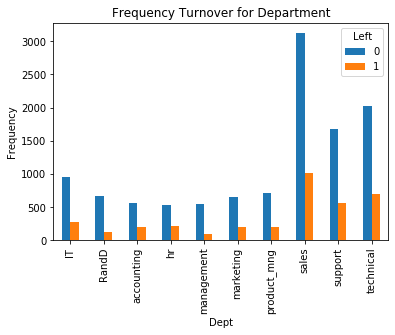

In [11]:
#Bar chart based on the department employee work for and the frequency of turnover
pd.crosstab(Concat_data.dept,Concat_data.Left).plot(kind='bar')
plt.title('Frequency Turnover for Department')
plt.xlabel('Dept')
plt.ylabel('Frequency')
plt.savefig('department_bar_chart')

The graph above indicates that the frequency of the employees turnover depends a lot on the department they are 
working for.

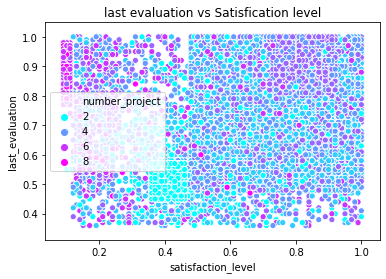

In [10]:
#Last Evaluation vs Satisfaction Level
plt.title("last evaluation vs Satisfication level")
sns.scatterplot(x=Concat_data['satisfaction_level'],y=Concat_data['last_evaluation'],hue='number_project',data=Concat_data, palette='cool')
plt.show()

Observations:
1. Satisfcation level is very low for employees with increasing number of projects.
2. Last evaluation for employees having number of projects 2 is low, also they have low satification level.

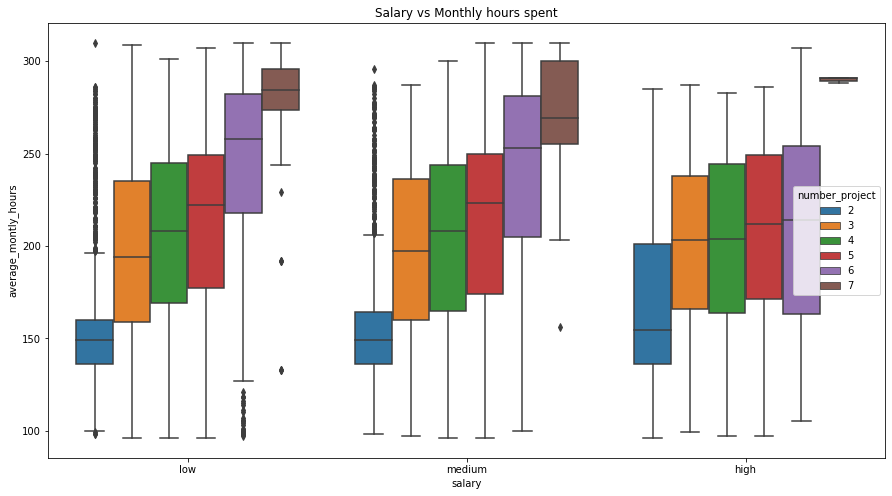

In [13]:
#Box plot of salary vs Monthly hours spent
plt.figure(figsize=(15,8))
plt.title("Salary vs Monthly hours spent")
sns.boxplot(x=Concat_data['salary'],y=Concat_data['average_montly_hours'],hue='number_project',data=Concat_data)
plt.show()

Observations:

1. Avereage monlthy hours is significantly low for employees who has 2 projects.
2. Employees from all levels for salary are loaded with projets and monthly hours is high.
3. We can see there are so many oultiers from low and meduim salary levels.
4. The box plot is bigger for low salary emplyoees who has number of projects equal to 3, 50% of these employees has high monthly hours.

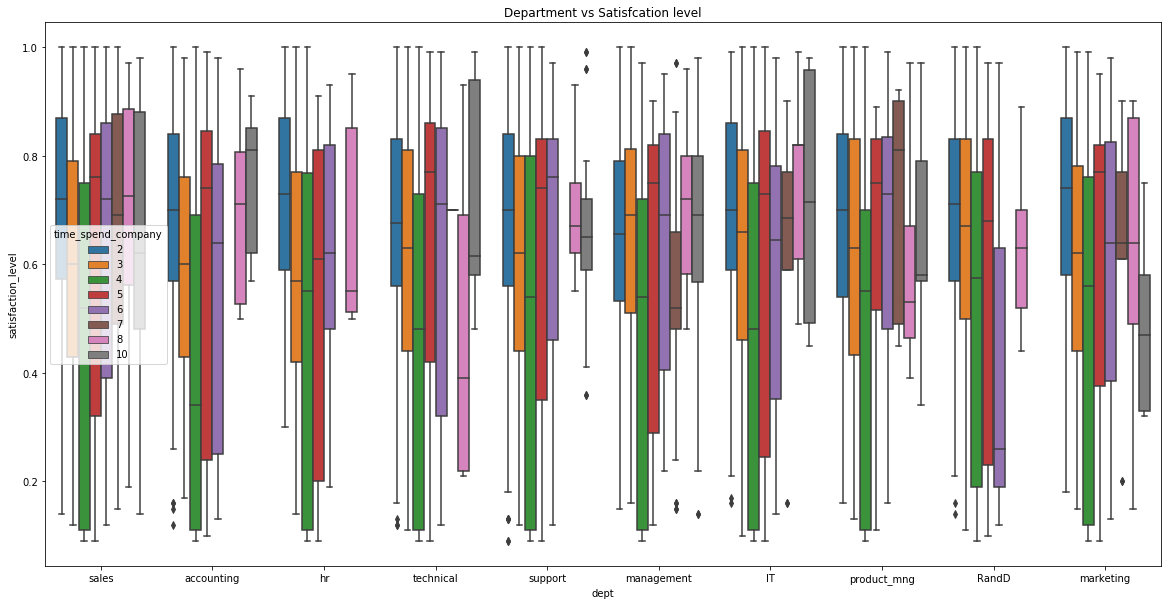

In [11]:
#Boxplot Department vs Satisfaction level
plt.figure(figsize=(20,10))
plt.title("Department vs Satisfcation level")
sns.boxplot(x=Concat_data['dept'],y=Concat_data['satisfaction_level'],hue='time_spend_company',data=Concat_data)
plt.show()

Observations:

1. Employees from R&D department having 6 years of time spend having large distribution of satisfaction levels.
2. Employees from sales and Technical department of 2 yeras of time spend is also having larger distributions of satisfaction levels as expected.

<Figure size 1296x720 with 0 Axes>

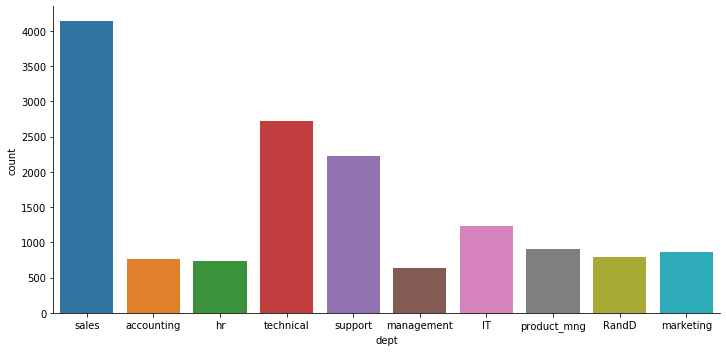

In [12]:
#Bar graph of employees leaving vs department
plt.figure(figsize=(18,10))
sns.catplot('dept',data=Concat_data,kind='count',aspect=2)
plt.show()

Observations:
1. Most of the employees leaving the company belongs to sales and technical department.

## 4. Data Modelling

In [19]:
#Dividing dataset into X and Y

X=Final_data.drop(['Emp ID','Left'],axis=1)

Y=Final_data['Left']

In [22]:
# Splitting the X and y into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,test_size=0.5,random_state=100)

### 1. Logistic Regression

In [24]:
# Logisstic regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model=LogisticRegression()
logreg=RFE(model,10)
logreg.fit(X_train,y_train)

/Users/pulkeshiandaruka/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pulkeshiandaruka/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

Evaluating Logistic Regression

In [25]:
# Model evaluation

from sklearn.metrics import accuracy_score

print("The Accuracy score using logistic regression is:{:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))

The Accuracy score using logistic regression is:0.772


### 2. KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
# Model evaluation

from sklearn.metrics import accuracy_score

print("The Accuracy score using KNN Classifier is:{:.3f}".format(accuracy_score(y_test,knn.predict(X_test))))

The Accuracy score using logistic regression is:0.933


### 3. Decision Trees 

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
# Model evaluation

from sklearn.metrics import accuracy_score

print("The Accuracy score using Decision Trees is:{:.3f}".format(accuracy_score(y_test,dtree.predict(X_test))))

The Accuracy score using Decision Trees is:0.971


### 4. Random Forest

In [26]:
# Random forest cloassifier

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [ ]:
#Evaluation of Random Forest

In [27]:
# Model evaluation

from sklearn.metrics import accuracy_score

print("The Accuracy score using Random Forest Classifier is:{:.3f}".format(accuracy_score(y_test,rfc.predict(X_test))))

The Accuracy score using Random Forest Classifier is:0.988


### 5. Support Vector Machine

In [28]:
# Support vector classifier

from sklearn.svm import SVC

model=SVC(C=1)

model.fit(X_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Evaluation of Support Vector Machine

In [29]:
# Model evaluation

from sklearn.metrics import accuracy_score

print("The Accuracy score using SVC is:{:.3f}".format(accuracy_score(y_test,model.predict(X_test))))

The Accuracy score using SVC is:0.770


Out of all this Random Forest has the best accuracy so we will perform the 10-fold cross-validation to confirm our results

## 10-Fold Cross-Validation

### Random Forest 10-Fold Cross-Validation

In [52]:
#For Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = RandomForestClassifier()
score = 'accuracy'
cv = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=score)
print("10-fold cross validation average accuracy for Random Forest Classifier: %.3f" % (cv.mean()))

/Users/pulkeshiandaruka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy for Random Forest Classifier: 0.986


### Support Vector Machine 10-Fold Cross-Validation

In [31]:
#For SVM
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = SVC()
score = 'accuracy'
cv = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=score)
print("10-fold cross validation average accuracy for SVM Classifier: %.3f" % (cv.mean()))

/Users/pulkeshiandaruka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy for SVM Classifier: 0.762


### K Nearest Neighbour 10-Fold Cross-Validation

In [53]:
#For KNN
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = KNeighborsClassifier()
score = 'accuracy'
cv = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=score)
print("10-fold cross validation average accuracy for K Nearest Neighbour Classifier: %.3f" % (cv.mean()))

/Users/pulkeshiandaruka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy for K Nearest Neighbour Classifier: 0.938


### Decision Tree 10-Fold Cross-Validation

In [54]:
#For Decision Trees
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=5)
modelCV = DecisionTreeClassifier()
score = 'accuracy'
cv = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=score)
print("10-fold cross validation average accuracy for Decision Trees Classifier: %.3f" % (cv.mean()))

10-fold cross validation average accuracy for K Nearest Neighbour Classifier: 0.971


/Users/pulkeshiandaruka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Model Evaluation 

In [34]:
#Precison Recall Scores for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5727
           1       0.99      0.95      0.97      1773

    accuracy                           0.99      7500
   macro avg       0.99      0.98      0.98      7500
weighted avg       0.99      0.99      0.99      7500



Confusion Matrix for Random Forest

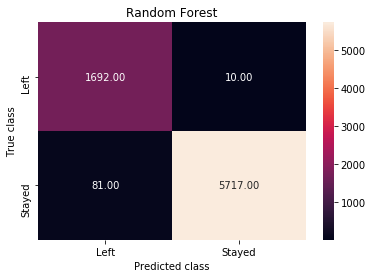

In [47]:
#Confusion Matrix for Random Forest
y_pred = rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')